In [1]:
#Imported all require libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [2]:
# read csv dataset as dataframe
df = pd.read_csv('cryptos.csv')
df

,Unnamed: 0,Crypto,Date,Open,High,Low,Close,Volume,Market Cap
0,0,Binance,28-02-2021,225.445941,228.173046,195.852670,209.574404,3.129699e+09,3.238612e+10
1,1,Binance,27-02-2021,221.980905,237.179435,220.099401,225.249443,2.755271e+09,3.480842e+10
2,2,Binance,26-02-2021,235.270287,238.755012,210.310761,221.680429,4.167146e+09,3.425689e+10
3,3,Binance,25-02-2021,254.467606,264.705134,233.885956,233.885956,4.059853e+09,3.614305e+10
4,4,Binance,24-02-2021,231.121604,280.088196,214.524714,254.359132,7.154122e+09,3.930683e+10
...,...,...,...,...,...,...,...,...,...
19126,2761,XRP,08-08-2013,0.004397,0.004424,0.004175,0.004254,0.000000e+00,3.325863e+07
19127,2762,XRP,07-08-2013,0.004669,0.004682,0.004333,0.004417,0.000000e+00,3.453412e+07
19128,2763,XRP,06-08-2013,0.005637,0.005661,0.004629,0.004680,0.000000e+00,3.659101e+07
19129,2764,XRP,05-08-2013,0.005875,0.005980,0.005613,0.005613,0.000000e+00,4.387916e+07


In [3]:
# change the date in string format to date format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
# date after which all the cryptos have equal amount of data available
specific_date = '2017-09-30 00:00:00'  

In [5]:
# filter the dataset with the specific date 
df = df[df['Date'] > specific_date]

In [6]:
# columns of the dataset
df = df[['Date','Crypto', 'Open', 'High', 'Low', 'Close', 'Volume','Market Cap']]

In [7]:
df
df1= df
df2= df1
df3= df2
df4= df3
df5= df4

In [8]:
# Convert string cryptocurrencies' names into numeric data
le = preprocessing.LabelEncoder()
df['Crypto'] = le.fit_transform(df['Crypto'])

In [9]:
open_mean = df['Open'] # mean of opening prices
close_mean = df['Close'] # mean of closing prices
high_mean = df['High'] # mean of highest prices
low_mean = df['Low'] # mean of lowest prices
open_close_avg = (df['Open'] + df['Close']) / 2 # average price on a day calculated with opening and closing prices
high_low_avg = (df['High'] + df['Low']) / 2 # average price on a day calculated with highest and lowest prices

In [10]:
# The average percentage change in price from opening to closing price
open_close = (open_mean/close_mean * 100) - 100

In [11]:
# The average percentage change in price between highest and lowest prices
high_low = (high_mean/low_mean * 100) - 100

In [12]:
# new dataframe without the original open, close, high and loe prices
new_df = df[['Date','Crypto', 'Volume','Market Cap']]

In [13]:
# rename the Market Cap column as MarketCap (comes in handy later in linear regression model)
new_df = new_df.rename(columns = {"Market Cap": "MarketCap"})

In [14]:
# adding calculated average features to the new dataframe
new_df['OpenClose'] = open_close # The average percentage change in price from opening to closing price
new_df['HighLow'] = high_low # The average percentage change in price between highest and lowest prices
new_df['AvgPrice'] = (open_close_avg + high_low_avg) / 2 # average price on a day calculated with opening-closing  and high-low prices

In [15]:
# get only the unique dates in order to calculate the sum of all market capital and volume on a day
dates = new_df['Date'].unique()

In [16]:
# create a new dataframe check
check = pd.DataFrame()

In [17]:
# calculating the sum of total market capital and volume of all cryptocurrencies on a day
# and calculating the percentage of each cryptocurrency's market capital and volume as a part of the total sum
# and adding these as features to the new dataframe

for i in range(len(dates)):
    data = new_df[new_df['Date'] == dates[i]] # get the entries on the dataset corresponding to the unique dates
    sum_mc = np.sum(data['MarketCap']) # sum of market capital per day
    sum_vol = np.sum(data['Volume']) # sum of volume per day
    
    data['MarketCap'] = data['MarketCap'] / sum_mc * 100 # each cryptocurrency's part in the total market capital
    data['Volume'] = data['Volume'] / sum_vol * 100 # each cryptocurrency's part in the total volume
    
    check = pd.concat([check, data]) # add the adjusted dataset to the new dataframe

In [18]:
check

,Date,Crypto,Volume,MarketCap,OpenClose,HighLow,AvgPrice
0,2021-02-28,0,1.389866,2.716893,7.573223,16.502392,214.761515
1315,2021-02-28,1,23.733861,70.588028,2.340049,8.035806,45322.459010
4179,2021-02-28,2,6.986660,3.414095,1.189515,16.724383,1.289721
5426,2021-02-28,3,0.896995,0.848326,6.364030,15.942324,25.181430
6684,2021-02-28,4,12.273309,13.644850,3.093928,12.912187,1411.193242
...,...,...,...,...,...,...,...
7930,2017-10-01,4,16.644267,25.264011,-0.261301,2.756036,300.534500
9963,2017-10-01,5,5.445965,2.554226,1.087025,2.865071,54.616574
13020,2017-10-01,7,0.083407,0.199908,0.913177,3.598702,0.013687
15420,2017-10-01,8,5.599478,0.384778,-0.265821,0.721311,0.998588


In [19]:
# group the newly created dataframe by cryptocurrencies
group_crypto = check.groupby('Crypto')

In [20]:
group_df = pd.DataFrame() # dataframe to store the mean dataset of each currency

group_df['Cryptos'] = check['Crypto'].unique() # unique dates (thus each day since the specific date)
group_df['OpenClose'] = group_crypto['OpenClose'].agg(np.mean) # mean of difference of opening and closing prices 
group_df['HighLow'] = group_crypto['HighLow'].agg(np.mean) # mean of difference of highest and lowest prices
group_df['MarketCap'] = group_crypto['MarketCap'].agg(np.mean) # mean market cappital percentage of each currency
group_df['Volume'] = group_crypto['Volume'].agg(np.mean) # mean volume percentage of each currency
group_df['AvgPrice'] = group_crypto['AvgPrice'].agg(np.mean) # average price calculated with opening-closing and high-low prices

In [21]:
group_df

,Cryptos,OpenClose,HighLow,MarketCap,Volume,AvgPrice
0,0,-0.155370,8.359344,1.071488,0.458698,20.077494
1,1,-0.095923,5.240957,69.258139,40.248561,10222.326331
2,2,-0.068914,9.769008,1.255743,0.624465,0.138810
3,3,-0.013277,11.815212,0.416654,0.407971,3.867924
4,4,0.027188,6.739537,14.808482,15.635820,384.195268
5,5,0.082176,7.558739,2.099740,4.438660,84.315522
6,6,-0.945874,11.859125,1.220109,0.819865,9.485905
7,7,-0.016895,9.442883,1.271531,0.604632,0.155545
8,8,-0.001160,1.649235,2.132482,33.630384,1.002603
9,9,0.151228,7.894376,7.496903,3.823917,0.410723


In [22]:
# in order to form a dataset based on the cryptocurrencies and not on the features as columns, the following is done

# new columns of the dataframe
binance, bitcoin, cardano, chainLink, ethereum, liteCoin, polkadots, stellar, tether, xrp = [], [], [], [], [], [], [], [], [], []

# storing the data of mean open-close and high-low differences, market capital, volume and average price per each new column
for i in range(len(group_df.columns)):
    binance.append(group_df.iloc[0,i])
    bitcoin.append(group_df.iloc[1,i])
    cardano.append(group_df.iloc[2,i])
    chainLink.append(group_df.iloc[3,i])
    ethereum.append(group_df.iloc[4,i])
    liteCoin.append(group_df.iloc[5,i])
    polkadots.append(group_df.iloc[6,i])
    stellar.append(group_df.iloc[7,i])
    tether.append(group_df.iloc[8,i])
    xrp.append(group_df.iloc[9,i])
group_df

,Cryptos,OpenClose,HighLow,MarketCap,Volume,AvgPrice
0,0,-0.155370,8.359344,1.071488,0.458698,20.077494
1,1,-0.095923,5.240957,69.258139,40.248561,10222.326331
2,2,-0.068914,9.769008,1.255743,0.624465,0.138810
3,3,-0.013277,11.815212,0.416654,0.407971,3.867924
4,4,0.027188,6.739537,14.808482,15.635820,384.195268
5,5,0.082176,7.558739,2.099740,4.438660,84.315522
6,6,-0.945874,11.859125,1.220109,0.819865,9.485905
7,7,-0.016895,9.442883,1.271531,0.604632,0.155545
8,8,-0.001160,1.649235,2.132482,33.630384,1.002603
9,9,0.151228,7.894376,7.496903,3.823917,0.410723


In [23]:
# transfrom cryptocurrencies as columns and attributes as rows
group_df_rev = pd.DataFrame({
    "Binance": [binance[1], binance[2], binance[3], binance[4], binance[5]],
    "Bitcoin": [bitcoin[1], bitcoin[2], bitcoin[3], bitcoin[4], bitcoin[5]],
    "Cardano": [cardano[1], cardano[2], cardano[3], cardano[4], cardano[5]],
    "ChainLink": [chainLink[1], chainLink[2], chainLink[3], chainLink[4], chainLink[5]],
    "Ethereum": [ethereum[1], ethereum[2], ethereum[3], ethereum[4], ethereum[5]],
    "Litecoin": [liteCoin[1], liteCoin[2], liteCoin[3], liteCoin[4], liteCoin[5]],
    "Polkadot": [polkadots[1], polkadots[2], polkadots[3], polkadots[4], polkadots[5]],
    "Stellar": [stellar[1], stellar[2], stellar[3], stellar[4], stellar[5]],
    "Tether": [tether[1], tether[2], tether[3], tether[4], tether[5]],
    "XRP": [xrp[1], xrp[2], xrp[3], xrp[4], xrp[5]]
})

# for convenience sake changing the row names
group_df_rev = group_df_rev.rename(index={0: 'OpenClose', 1: 'HighLow', 2:'MarketCap', 3:'Volume', 4:'AvgPrice'})
group_df_rev

,Binance,Bitcoin,Cardano,ChainLink,Ethereum,Litecoin,Polkadot,Stellar,Tether,XRP
OpenClose,-0.155370,-0.095923,-0.068914,-0.013277,0.027188,0.082176,-0.945874,-0.016895,-0.001160,0.151228
HighLow,8.359344,5.240957,9.769008,11.815212,6.739537,7.558739,11.859125,9.442883,1.649235,7.894376
MarketCap,1.071488,69.258139,1.255743,0.416654,14.808482,2.099740,1.220109,1.271531,2.132482,7.496903
Volume,0.458698,40.248561,0.624465,0.407971,15.635820,4.438660,0.819865,0.604632,33.630384,3.823917
AvgPrice,20.077494,10222.326331,0.138810,3.867924,384.195268,84.315522,9.485905,0.155545,1.002603,0.410723


In [24]:
# columns of new dataframe
cryptos = ['Binance', 'Bitcoin', 'Cardano', 'ChainLink', 'Ethereum', 'Litecoin', 'Polkadot', 'Stellar', 'Tether', 'XRP']

In [25]:
# x-axis = unique dates since the specific date
x = check['Date'].unique()

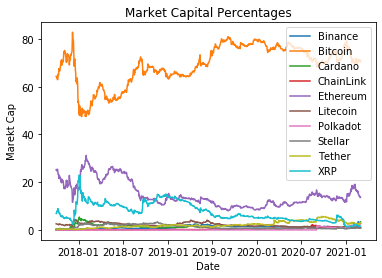

In [26]:
# plotting the market capital percentages of each cryptocurrency 

for i in range(0, len(cryptos)):
    plt_data = check[check['Crypto'] == i] # dataset consisting of specific unique date
    y = plt_data['MarketCap'] # data to be plotted
    j = len(y) # length of the data necessary (we also have a cryptocurrency with less data)
    
    # since no data means there was no cryptocurrency before this period of time, and therefore fill it with minimum values
    while j != len(x):
        y[j] = np.min(plt_data['MarketCap'])
        j += 1
    
    plt.plot(x, y, label = cryptos[i]) # plot the market capital of each cryptocurrency

plt.xlabel('Date')
plt.ylabel('Marekt Cap')
plt.title('Market Capital Percentages')
plt.legend()
plt.rcParams["figure.figsize"] = (20, 25)
plt.show()

**Interpretation :** <br>
**1)** Bitcoin has the highest market capital value followed by Ethereum and XRP.<br>
**2)** On average, Bitcoin has increased in market capital throughout the years, while Ethereum and XRP have relatively decreased.<br>
**3)** Notably, as Bitcoin increases in market capital, XRP decreases. This might point towards a negative correlation.<br>
**4)** Since the market capital is mostly taken over by Bitcoin, Ethereum, XRP and Litecoin, this could be suggestive of our choice later.<br>
**5)** The market capital of remaining currencies is relatively negligible comparing with the above 4.<br>

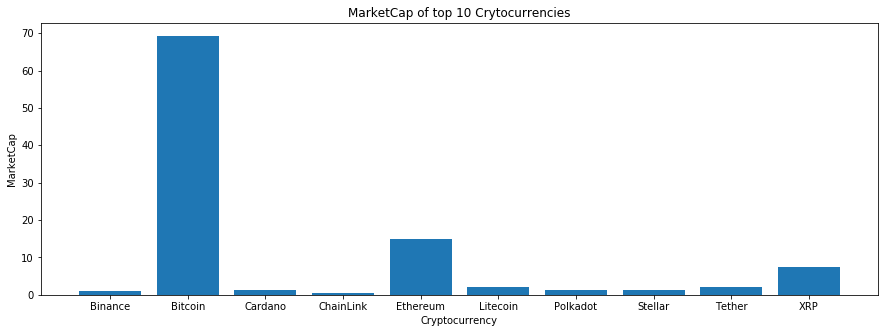

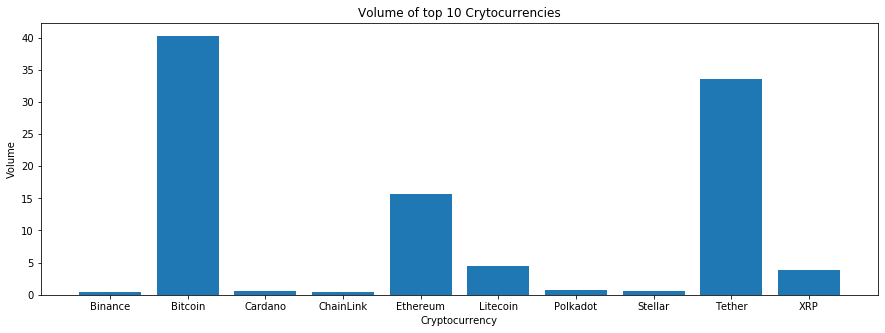

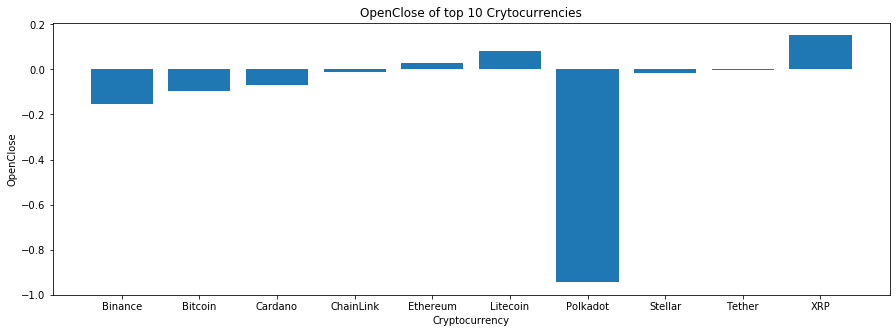

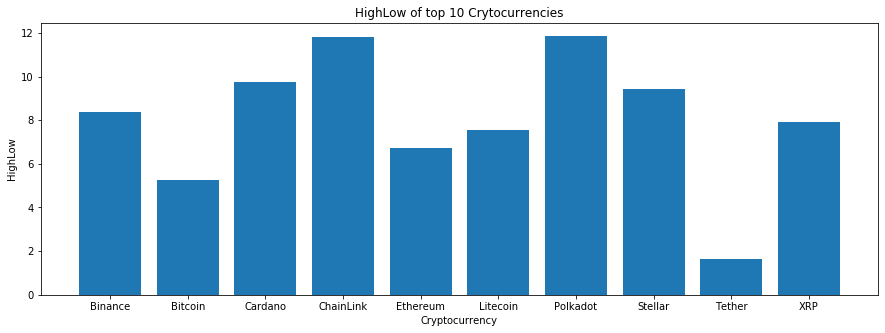

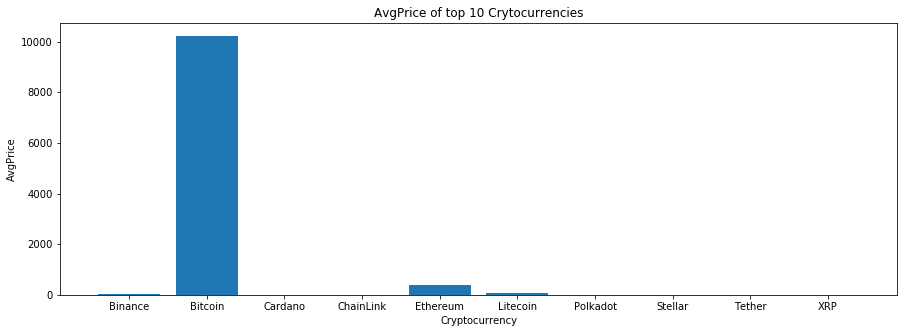

In [27]:
# plots of market capital, volume, difference of opening-closing and highest-lowest prices and the average price of each cryptocurrency
strings = ['MarketCap', 'Volume', 'OpenClose', 'HighLow', 'AvgPrice'] # features to be plotted
# plotting
for i in range(len(group_df.columns) - 1):
    string = strings[i] + ' of top 10 Crytocurrencies'
    plt.rcParams["figure.figsize"] = (15, 5)
    plt.bar(cryptos, group_df[strings[i]])
    plt.title(string)
    plt.xlabel('Cryptocurrency')
    plt.ylabel(strings[i])
    plt.show()

**Interpretation:** <br>
**Market Capital:** <br>
**1)** Bitcoin with the higgest market capital followed by Ethereum, XRP, Litecoin and Thether. <br>
**2)** Binance, Cardano, Polkadot and Stellar follow the above currencies followed by ChainLink with the least market capital.<br>
**3)** Higher market capital means either higher volum of the currency, higher price of it or both (we'll come back to this later). <br>

**Volume:**<br>
**1)** Bitcoin again with the higgest volume followed by Tether, Ethereum, Litecoin and XRP. <br>
**2)** Remaining currencies are at around the similar ranks.<br>
**3)** Botcoin, Ethereum, Litecoin and Tether have chances of having prices in descending order as given since the market capital and volume follow a similar pattern. <br>
**4)** Tether might be interesting to look at, with a low market capital and high volume.<br>

**Difference in Opening-Closing prices:**<br>
**1)** XRP, Ethereum, Litecoin and Tether have positive differences, meaning on average they've had higher closing prices than the opening prices.<br>
**2)** Tether with unchanging value explains the always positive difference.<br>
**3)** Polkadot has a very negative difference, meaning on average it has had more higher closing than opening prices. <br>
**4)** Binance, Bitcoin and Cardano follow after Polkadot, however, with much less difference.<br>
**5)** ChainLink and Stellar have less opening-closing price differences, however, this adds to no positive remark since they both have lower market capital and volume.<br>

**Difference in Highest-Lowest prices:**<br>
**1)** This is to observe the average fluctuation of price per day. <br>
**2)** Tether has the lowest flctuation and thus relatively more constant in price compared to the other currencies.<br>
**3)** Bitcoin, Ethereum and Litecoin follow after tether. <br>
**4)** Polkadot, ChainLink, Cardano and Stellar have the highest fluctuations and thus have relatively low constant price and therefore are less attractive.<br>

**Average price:**<br>
**1)** Bitcoin has the highest average price followed by Ethereum, Litecoin and Binance. <br>
**2)** Bitcoin having the highest price and volume explains its highest market capital. <br>

In [28]:
# The correlation matrix based on all cryptocurrencies
cor_matrix = group_df_rev.corr()
cor_matrix

,Binance,Bitcoin,Cardano,ChainLink,Ethereum,Litecoin,Polkadot,Stellar,Tether,XRP
Binance,1.000000,0.915381,0.112592,0.455939,0.913708,0.940005,0.793691,0.110884,-0.354534,-0.265270
Bitcoin,0.915381,1.000000,-0.296953,0.060677,0.999461,0.996961,0.482760,-0.298594,-0.255399,-0.531479
Cardano,0.112592,-0.296953,1.000000,0.931242,-0.299356,-0.230854,0.691397,0.999984,-0.206184,0.686316
ChainLink,0.455939,0.060677,0.931242,1.000000,0.055902,0.128307,0.896581,0.930443,-0.304720,0.460930
Ethereum,0.913708,0.999461,-0.299356,0.055902,1.000000,0.997126,0.481729,-0.301068,-0.234252,-0.515852
Litecoin,0.940005,0.996961,-0.230854,0.128307,0.997126,1.000000,0.542816,-0.232716,-0.240334,-0.488117
Polkadot,0.793691,0.482760,0.691397,0.896581,0.481729,0.542816,1.000000,0.689934,-0.337719,0.244132
Stellar,0.110884,-0.298594,0.999984,0.930443,-0.301068,-0.232716,0.689934,1.000000,-0.210387,0.687649
Tether,-0.354534,-0.255399,-0.206184,-0.304720,-0.234252,-0.240334,-0.337719,-0.210387,1.000000,0.028170
XRP,-0.265270,-0.531479,0.686316,0.460930,-0.515852,-0.488117,0.244132,0.687649,0.028170,1.000000


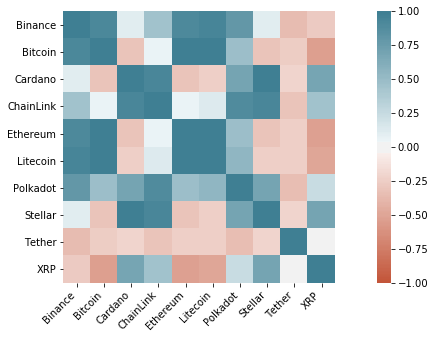

In [29]:
# The visualization of cryptocurrencies' correlation matrix
heat_corr = sns.heatmap(
                        cor_matrix,
                        vmin = -1,
                        vmax = 1,
                        center = 0,
                        cmap = sns.diverging_palette(20,220,n=200),
                        square = True)

heat_corr.set_xticklabels(heat_corr.get_xticklabels(),
                         rotation = 45,
                         horizontalalignment = 'right'
                         );

**Interpretation:**<br>
**1)** The more the score of correlation is towards the green color the higher the positive correlation of two coins.<br>
**2)** The more it is towards the red color the more negatively correlated the two coins are. <br>
**3)** XRP, Tether, Stellar and Cardano are negatively correlated to Bitcoin, meaning, if the values of these currencies increase, the value of Bitcoin decreases and vice-versa.<br>
**4)** Bitcoin, Binance, Ethereum and Litecoin are positively correlated, meaning, as the value of one of these currencies increases, the values of the rest of them increase as well.<br>
**5)** Interesting to observe is that XRP has the highest negative correlation with Ethereum, Bitcoin and Litecoin and all of these have so far had notable features (high market capital, volume, price, open-close and high-low differences).<br>

In [30]:
# features taken into account so far
features = check.columns

print("R-Squared values")
print("--------------------")

# generating the R-Squared values for each feature based on a single linear model
for i in range(len(features)):
    if features[i] != 'MarketCap':
        x = "MarketCap ~ " + features[i]
        market_cap = sm.ols(formula = x, data = check).fit()
        print(features[i], ": ", market_cap.rsquared * 100, '%')

R-Squared values
--------------------
Date :  0.03868042569861174 %
Crypto :  11.976091302898284 %
Volume :  45.53674406741146 %
OpenClose :  0.001986433551492972 %
HighLow :  1.239854606530788 %
AvgPrice :  59.00412931463952 %


**Interpretation:**<br>
**1)** The single linear model is fit observe the correspondence of each attribute on the variance of market capital.<br>
**2)** The average price accounts the highest and for 59% of market capital's variance. <br>
**3)** Volume is next in line with 45.5% accountancy. <br>
**4)** The remaining attributes' R-squared values are low and thus thus contributing to much less variance of market capital.<br>

In [31]:
# the cloumns of the dataframe based on cryptocurrencies --> all cryptocurrencies
features = group_df_rev.columns

print("R-Squared values")
print("--------------------")

# generating R-Squared values of each cryptocurrency
for i in range(len(features)):
    if features[i] != 'Bitcoin':
        x = "Bitcoin ~ " + features[i]
        btc = sm.ols(formula = x, data = group_df_rev).fit()
        print(features[i], ": ", btc.rsquared * 100, '%')

R-Squared values
--------------------
Binance :  83.79228543838764 %
Cardano :  8.818134920856247 %
ChainLink :  0.36816796425570564 %
Ethereum :  99.89216408298233 %
Litecoin :  99.3930764291201 %
Polkadot :  23.30569745502067 %
Stellar :  8.915834542974055 %
Tether :  6.522857664745285 %
XRP :  28.24695293126017 %


**Interpretation:**<br>
**1)** The single linear model is fit to observe the correspondence of every other cryptocurrency on the variance of Bitcoin.<br>
**2)** Ethereum and Litecoin have the highest R-Squared values and thus accounting the most for the variance of Bitcoin, followed by Binance.<br>
**3)** The above explains the positive correlation between the concerned currencies.<br>
**4)** Cardano, ChainLink, Polkadot, Stellar, Tether and XRP have lower R-squared values and thus accounting for much less of the variance of Bitcoin. <br>
**5)** The above explains the negative correlation between them and the positively correlated currencies.<br>

In [32]:
# fit the linear regression model to observe how ethereum accounts for the variance in Bitcoin
# The linear regression model is Bitcoin = beta_0 + beta_1 * Ethereum
single_model = sm.ols(formula = "Bitcoin ~ Ethereum", data = group_df_rev).fit()
single_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Bitcoin   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2779.
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.50e-05
Time:                        22:32:22   Log-Likelihood:                -31.580
No. Observations:                   5   AIC:                             67.16
Df Residuals:                       3   BIC:                             66.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -221.4361     88.665     -2.497      0.088    -503.608      60.736
Ethereum      27.1571      0.515     52.716      0.000      25.518      28.797
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.981
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.355
Skew:                           0.426   Prob(JB):                        0.837
Kurtosis:                       2.010   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:**<br>
**1)** As discussed above, the R-squared value of the model based on Ethereum is 0.99, which means that the model accounts for 99% of the variance in bitcoin.<br>
**2)** Single linear model: * Bitcoin = beta_0 + beta_1 * Ethereum --> Bitcoin = -221.5556 + 27.1706 * Ethereum. <br>
**3)** The coeffienct of Etherium is positive, meaning, if Ethereum increases by 1 unit then Bitcoin increases by 27.1706 units. (positive correlation)<br>
**4)** The p-value of Ethereum's coefficient is 0, meaning, it is significatly different and thus it doesn't occur by chance.<br>

In [33]:
# since we have already observed that XRP, Tether and Cardano are negatively correlated to Bitcoin, 
# we can fit the mosel with these features to observe how much each influences Bitcoin.

# necessary features
features = ['Cardano', 'Tether', 'XRP', 'Stellar']
model_data = group_df_rev[['Binance', 'Bitcoin', 'Cardano', 'ChainLink', 'Ethereum', 'Litecoin', 'Polkadot', 'Stellar', 'Tether', 'XRP']]

print('Coefficients:')
print('-----------------------------')
for i in range(len(features)):
    formula = 'Bitcoin ~ ' + features[i]
    single_model = sm.ols(formula = formula, data = model_data).fit()
    print(features[i], ':', single_model.params[1])

Coefficients:
-----------------------------
Cardano : -323.7104577408953
Tether : -80.14774323231245
XRP : -652.751883964068
Stellar : -337.8922164704557


**Interpretation:**<br>
**1)** For one unit of increase in Bitcoin, XRP, Stellar, Cardano and Tether each decreases 653, 338, 324 and 80 in units respectively.<br>
**2)** XRP can be observed to be the highest negatively correlated currency to Bitoin, followed by Stellar, Cardano and finally Tether.<br>

In [34]:
# Convert string date values into date format
check['Date'] = le.fit_transform(check['Date'])

In [35]:
# x and y coordinates for prediction the market capital
x = check[['Date', 'Crypto', 'Volume', 'OpenClose', 'HighLow', 'AvgPrice']]
y = check['MarketCap']

In [36]:
# x and y coordinates for predicting the average price
x1 = check[['Date', 'Crypto', 'MarketCap', 'Volume', 'OpenClose', 'HighLow']]
y1 = check['AvgPrice']

In [37]:
# Split the dataset into train and test set for predicting the market capital
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [38]:
# Split the dataset into train and test set for predicting the average price
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

In [39]:
# fit the gradient boosting regression model on train set 
model_GBR = GradientBoostingRegressor().fit(x_train, y_train)
y_pred_GBR = model_GBR.predict(x_test) # predict values on test set

# compute the accuracy of train and test set
score_train_GBR = model_GBR.score(x_train, y_train)
score_test_GBR = model_GBR.score(x_test, y_test)

In [40]:
print('Gradient Boosting Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_GBR)
print('---------------------------------------')
print('Test score: ', score_test_GBR)

Gradient Boosting Regression Results: 
---------------------------------------
Train score:  0.9980339075137902
---------------------------------------
Test score:  0.9975093754814998


**Interpretation:**<br>
**1)** With around 99% for both training and testing accuracy, the model is optimal.<br>

In [41]:
# fit random forest regression model on train set
model_RFR = RandomForestRegressor().fit(x_train, y_train)
# predict the value on test set
y_pred_RFR = model_RFR.predict(x_test)
# compute the accuracy of train and test set
score_train_RFR = model_RFR.score(x_train, y_train)
score_test_RFR = model_RFR.score(x_test, y_test)

In [42]:
print('Random Forest Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_RFR)
print('---------------------------------------')
print('Test score: ', score_test_RFR)

Random Forest Regression Results: 
---------------------------------------
Train score:  0.9999589335808992
---------------------------------------
Test score:  0.9996999907890071


**Interpretation:**<br>
**1)** Again, same as the GBR, with around 99% for both training and testing accuracy, the model is optimal.<br>
**2)** Since both models so far have a 99% accuracy, we may assume that the 99% accuracy is more to the correct direction.<br>

In [43]:
# Compare all acurracies of train and test sets of different regression models
indices = ['Test_GBR', 'Train_GBR', 'Test_RFR', 'Train_RFR']
scores = [score_test_GBR, score_train_GBR, score_test_RFR, score_train_RFR]

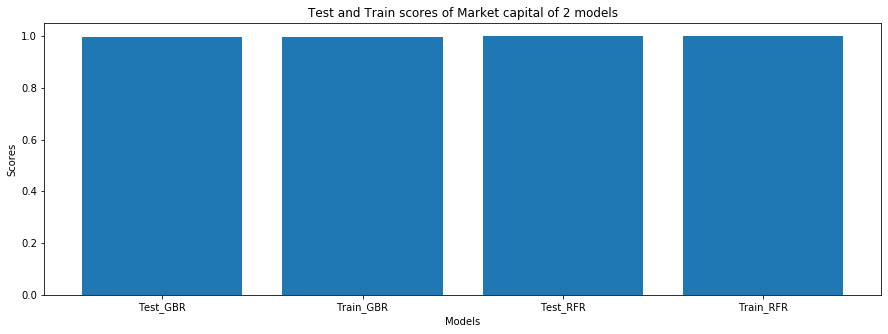

In [44]:
# Plot the train score of different regression models
plt.bar(indices, scores)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Test and Train scores of Market capital of 2 models')
plt.show()

**Interpretation:**<br>
**1)** Visualization of the constant accuracy rates

In [45]:
# fit the gradient boosting regression model on train set 
model_GBR1 = GradientBoostingRegressor().fit(x_train1, y_train1)
# predict values on test set
y_pred_GBR1 = model_GBR1.predict(x_test1)
# compute the accuracy of train and test set
score_train_GBR1 = model_GBR1.score(x_train1, y_train1)
score_test_GBR1 = model_GBR1.score(x_test1, y_test1)

In [46]:
print('Gradient Boosting Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_GBR1)
print('---------------------------------------')
print('Test score: ', score_test_GBR1)

Gradient Boosting Regression Results: 
---------------------------------------
Train score:  0.9952592516995146
---------------------------------------
Test score:  0.9921118749518538


**Interpretation:**<br>
**1)** Just as for the prediction of market capital, the accuracy is around 99% for the prediction of average price using GBR.

In [47]:
# fit random forest regression model on train set
model_RFR1 = RandomForestRegressor().fit(x_train1, y_train1)
# predict the value on test set
y_pred_RFR1 = model_RFR1.predict(x_test1)
# compute the accuracy of train and test set
score_train_RFR1 = model_RFR1.score(x_train1, y_train1)
score_test_RFR1 = model_RFR1.score(x_test1, y_test1)

In [48]:
print('Random Forest Regression Results: ')
print('---------------------------------------')
print('Train score: ', score_train_RFR1)
print('---------------------------------------')
print('Test score: ', score_test_RFR1)

Random Forest Regression Results: 
---------------------------------------
Train score:  0.9993553551386947
---------------------------------------
Test score:  0.996730443474124


**Interpretation:**<br>
**1)** Having both the models produce and accuracy of around 99% for the prediction of average price confirms the correctness.

In [49]:
# dataframe of test data and the predictions generated of Market cap
result_mc = pd.DataFrame()
result_mc = x_test
result_mc['GBR'] = y_pred_GBR
result_mc['RFR'] = y_pred_RFR
result_mc['Average_MC_Pred'] = (y_pred_GBR + y_pred_RFR) / 2
result_mc['Date'] = le.inverse_transform(result_mc['Date'])
result_mc.sort_values(by=['Date'], inplace = True, ascending=False)

In [50]:
# dataframe of test data and the predictions generated of Average price
result_price = pd.DataFrame()
result_price = x_test1
result_price['GBR'] = y_pred_GBR1
result_price['RFR'] = y_pred_RFR1
result_price['Average_Price_Pred'] = (y_pred_GBR1 + y_pred_RFR1) / 2
result_price['Date'] = le.inverse_transform(result_price['Date'])
result_price.sort_values(by=['Date'], inplace = True, ascending=False)

In [51]:
# reverting the cryptocurrencies from numeric to string format
market_cap = pd.DataFrame()
avg_price = pd.DataFrame()

for i in range(len(cryptos)):
    data1 = result_mc[result_mc['Crypto'] == i]
    data2 = result_price[result_price['Crypto'] == i]
    
    for j in range(len(data1)):
        data1.iloc[j, 1] = cryptos[i]
        data2.iloc[j, 1] = cryptos[i]
    
    market_cap = pd.concat([market_cap, data1])
    avg_price = pd.concat([avg_price, data2])

In [52]:
# Compare all acurracies of train and test sets of different regression models
scores1 = [score_test_GBR1, score_train_GBR1, score_test_RFR1, score_train_RFR1]

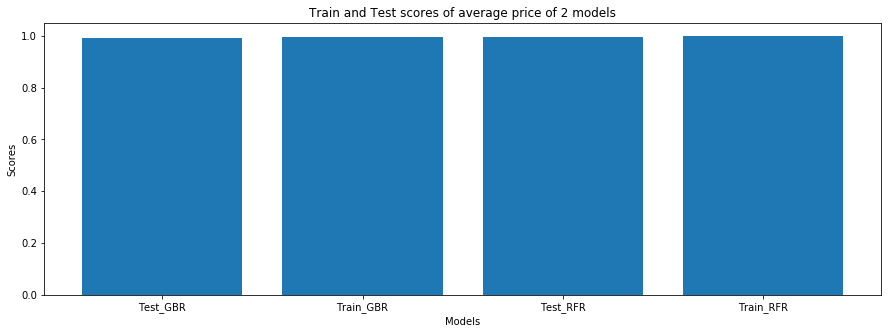

In [53]:
# Plot the train score of different regression models
plt.bar(indices, scores1)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train and Test scores of average price of 2 models')
plt.show()

**Interpretation:**<br>
**1)** Again, having similar accuracy scores for all train and test models assures correctness.

In [54]:
# grouping dataframe by crypto to create test dataframe of market capital
group_mc = market_cap.groupby('Crypto')
group_mc_all = pd.DataFrame()

In [55]:
cols = market_cap.columns # columns of test and predicted dataset
group_mc_all['Crypto'] = market_cap['Crypto'].unique() # grouping based on cryptocurrencies

# for every other feature, calculate the mean of them and add them to the dataframe
for i in range(len(cols)):
    if cols[i] != 'Date' and cols[i] != 'Crypto':
        vals = group_mc[cols[i]].agg(np.mean)
        group_mc_all[cols[i]] = vals.values

In [56]:
# grouping dataframe by crypto to create test dataframe of average price
group_price = avg_price.groupby('Crypto')
group_price_all = pd.DataFrame()

In [57]:
cols = avg_price.columns # columns of test and predicted dataset
group_price_all['Crypto'] = avg_price['Crypto'].unique()

# for every other feature, calculate the mean of them and add them to the dataframe
for i in range(len(cols)):
    if cols[i] != 'Date' and cols[i] != 'Crypto':
        vals = group_price[cols[i]].agg(np.mean)
        group_price_all[cols[i]] = vals.values

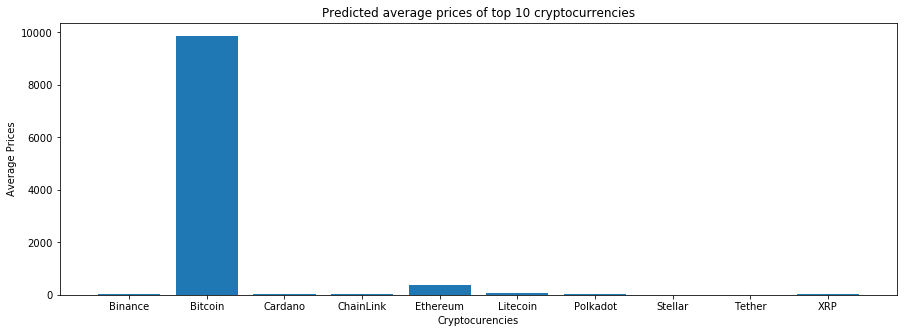

In [58]:
# plotting the average price of each cryptocurrency
plt.bar(group_price_all['Crypto'], group_price_all['Average_Price_Pred'])
plt.xlabel('Cryptocurencies')
plt.ylabel('Average Prices')
plt.title('Predicted average prices of top 10 cryptocurrencies')
plt.show()

**Interpretation:**<br>
**1)** As we've observed so far, Bitcoin has the highest average price predicted.<br>
**2)** Ethereum and Litecoin follow after.<br>
**3)** Below is another plot without Bitcoin so as to observe the other ccoins better.<br>

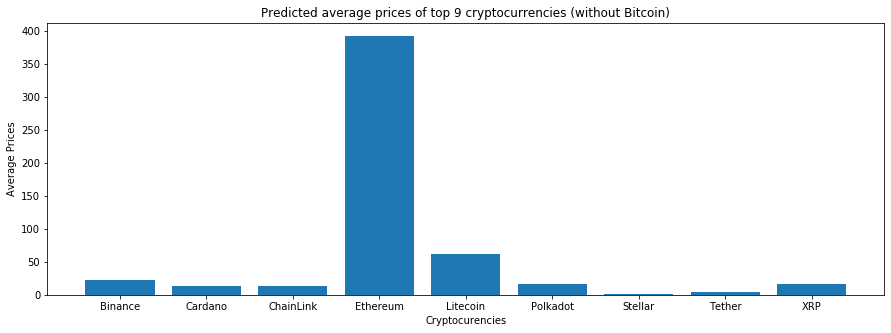

In [59]:
# plotting the average price of all cryptocurrencies except Bitcoin (so we can see better)
group_price_all = group_price_all[group_price_all['Crypto'] != 'Bitcoin']
plt.bar(group_price_all['Crypto'], group_price_all['Average_Price_Pred'])
plt.xlabel('Cryptocurencies')
plt.ylabel('Average Prices')
plt.title('Predicted average prices of top 9 cryptocurrencies (without Bitcoin)')
plt.show()

**Interpretation:**<br>
**1)** After Bitcoin, Ethereum and Litecoin, Binance and XRP have relatively high average prices.<br>
**2)** Tether, since always having 1 dollar of average price, is one of the least average prices.<br>
**3)** However, Stellar has an average price lower than Tether, meaning this is much less attractive than any other currencies.<br>

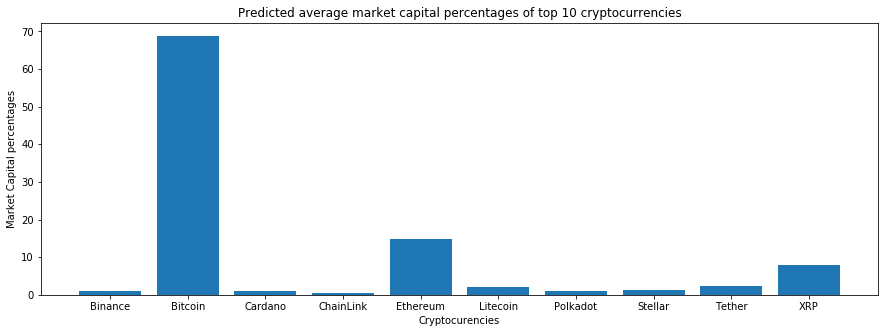

In [60]:
# plotting the average market capital percentage of all cryptocurrencies
plt.bar(group_mc_all['Crypto'], group_mc_all['Average_MC_Pred'])
plt.xlabel('Cryptocurencies')
plt.ylabel('Market Capital percentages')
plt.title('Predicted average market capital percentages of top 10 cryptocurrencies')
plt.show()

**Interpretation:**<br>
**1)** Again, as we've observed so far, Bitcoin has the highest market capital predicted.<br>
**2)** Ethereum and XRP follow after.<br>
**3)** Tether and Litecoin are on the same level, and the rest of the currencies indicate less attractiveness.<br>

### POINTS FOR VIDEO

**1)** The first plot with market capital --> Bitcoin, Ethereum, Litecoin, Tether and XRP are in the attractive list. <br>
**2)** This is confirmed with the volume plot --> all of the above are in the highest volume plot as well, but now Tether the 2nd highest volume.<br>
**3)** Jerry might be wondering between all of the above and be very interested in Tether, because of the highest volume.<br>
**4)** But he learns the reason behind it --> 1 dollar and changing back and forth from other currencies. <br>
**5)** So he might not actually find it attractive anymore. <br>
**6)** Opening and Closing price differences confirm that he's definitely not interested in Polkadot. <br>
**7)** Highest and Loweste price differences confirm the above again, plus that he is not interested in Cardano, ChainLink and Stellar either.<br>
**8)** Checking the colorful matrix, he realizes that he should either buy Tether and/or XRP or Bitcoin, Litecoin, Ethereum and/or Binance --> negative correlation. <br>
**9)** He uses agents GBR and RFR who are 99% accurate in the work they do to investigate further and finds out that Bitcoin shall have the highest average price and market capital in the future as well. <br>
**10)** They also recommend Ethereum and XRP in case he is broke, however, he has to make sure that he doesn't buy both. <br>
**11)** Since Jerry is very rich, he might want to invest all of his money on Bitcoin, or if he first wants to go easy, he could go for either Ethereum or XRP.<br>

In [61]:
import math
# The correlation matrix of df
cor_matrix = df.corr()
# Forcasting 5% of the df 
forecast = int(math.ceil(0.05 * len(df))) 

# The predicted Market Capital and Close .
df['Pred_mc'] = df['Market Cap'].shift(-forecast)
df['Pred_close'] = df['Close'].shift(-forecast)

print(cor_matrix)

              Crypto      Open      High       Low     Close    Volume  \
Crypto      1.000000 -0.312287 -0.310542 -0.314440 -0.311730  0.067348   
Open       -0.312287  1.000000  0.999392  0.998953  0.998759  0.437690   
High       -0.310542  0.999392  1.000000  0.998860  0.999534  0.438581   
Low        -0.314440  0.998953  0.998860  1.000000  0.999288  0.435956   
Close      -0.311730  0.998759  0.999534  0.999288  1.000000  0.437566   
Volume      0.067348  0.437690  0.438581  0.435956  0.437566  1.000000   
Market Cap -0.267469  0.976757  0.977778  0.977034  0.978129  0.476720   

            Market Cap  
Crypto       -0.267469  
Open          0.976757  
High          0.977778  
Low           0.977034  
Close         0.978129  
Volume        0.476720  
Market Cap    1.000000  
Days that are forecasted: 571


In [62]:
# Encoded the date format into numeric
df['Date'] = le.fit_transform(df['Date'])

In [63]:
# considering only bitcoin currency
df1 = df[ df['Crypto'] ==1]
df1



,Date,Crypto,Open,High,Low,Close,Volume,Market Cap,Pred_mc,Pred_close
1315,1246,1,46194.016352,46716.430993,43241.618227,45137.770468,5.344389e+10,8.414290e+11,2.133304e+11,11941.968341
1316,1245,1,46344.772237,48253.270101,45269.025766,46188.451275,4.591095e+10,8.609781e+11,2.050233e+11,11478.169346
1317,1244,1,47180.464054,48370.785260,44454.842114,46339.760083,3.509679e+11,8.637523e+11,2.108488e+11,11805.653725
1318,1243,1,49709.082425,51948.966982,47093.853019,47093.853019,5.450657e+10,8.777661e+11,1.959079e+11,10970.184216
1319,1242,1,48835.087661,51290.136695,47213.498162,49705.333316,6.369552e+10,9.263931e+11,1.932340e+11,10821.726510
...,...,...,...,...,...,...,...,...,...,...
2557,4,1,4229.879883,4362.640137,4164.049805,4328.410156,1.161770e+09,7.187628e+10,1.372521e+09,0.052938
2558,3,1,4319.370117,4352.310059,4210.419922,4229.359863,1.116770e+09,7.022503e+10,1.425500e+09,0.054981
2559,2,1,4408.459961,4432.470215,4258.890137,4317.479980,1.288020e+09,7.168107e+10,1.347716e+09,0.051981
2560,1,1,4395.810059,4470.229980,4377.459961,4409.319824,1.431730e+09,7.319565e+10,1.235204e+09,0.047641


In [64]:
# X is the array of all attributes in df1 execpt Pred_mc
x1 = np.array(df1.drop(['Pred_mc'], 1)) 
# The standard scaler 
std_scaler = StandardScaler()
std_scaler.fit(X)
x1 = std_scaler.transform(x1)

X_Pred2 = x1[-forecast:] # data to be predicted
x1 = x1[:-forecast] # data to be trained

df.dropna(inplace=True)
y1 = np.array(df1['Pred_mc'])
y1 = y[:-forecast]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
model_score = lr.score(X_test, y_test)
print('The accuracy of the linear model that predicts Market capital is ' , model_score)

(676, 9) (676,)


0.9997670248357254

In [65]:
last_date = df1.index[-1] #getting the lastdate in the dataset
#last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_date + one_day # getting the time in seconds for the next day
forecast_set = lr.predict(X_Pred2) # predicting forecast data
df1['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df1.loc[next_date] = [np.nan for _ in range(len(df1.columns)-1)]+[i]
    

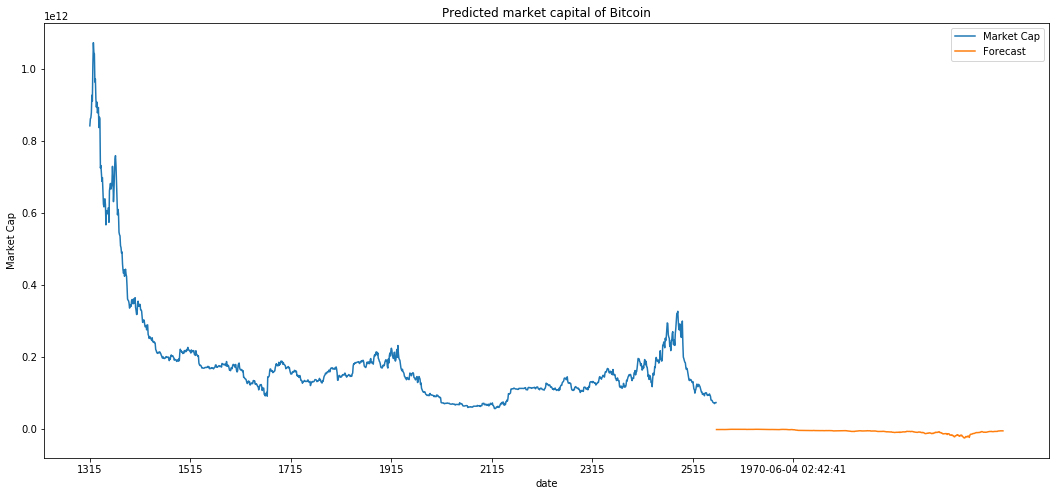

In [66]:
plt.figure(figsize=(18, 8))
df1['Market Cap'].plot()
df1['Forecast'].plot()
plt.legend(loc=1)
plt.xlabel('date')
plt.ylabel('Market Cap')
plt.title('Predicted market capital of Bitcoin')
plt.show()

In [67]:

df2 = df[ df['Crypto'] ==4]
df2


,Date,Crypto,Open,High,Low,Close,Volume,Market Cap,Pred_mc,Pred_close
6684,1246,4,1459.860435,1468.391510,1300.472117,1416.048906,2.763703e+10,1.626504e+11,2.427551e+10,226.391008
6685,1245,4,1446.929455,1524.932428,1433.786929,1459.973121,2.074210e+10,1.676759e+11,2.423271e+10,226.020650
6686,1244,4,1478.653270,1559.028891,1407.979253,1446.033650,3.143600e+10,1.660555e+11,2.510808e+10,234.215027
6687,1243,4,1625.393882,1670.224062,1465.058946,1475.703735,2.448168e+10,1.694427e+11,2.386737e+10,222.669727
6688,1242,4,1571.476497,1710.983795,1511.018963,1626.575705,3.132900e+10,1.867440e+11,2.384512e+10,222.490335
...,...,...,...,...,...,...,...,...,...,...
7926,4,4,292.773010,298.040985,288.839996,295.863007,2.537470e+08,2.809834e+10,5.404273e+09,85.749230
7927,3,4,292.753998,299.394012,290.894989,292.657990,2.579060e+08,2.778944e+10,5.655924e+09,89.752667
7928,2,4,297.483002,300.110992,288.132996,292.463013,3.216800e+08,2.776644e+10,5.382272e+09,85.419476
7929,1,4,302.481995,302.920013,294.582001,297.475006,3.394430e+08,2.823776e+10,5.319984e+09,84.439377


In [68]:

scaler = StandardScaler()
X = np.array(df2.drop(['Pred_mc'], 1)) 
scaler.fit(X)

X = scaler.transform(X)

X_Pred2 = X[-forecast:] # data to be predicted
X = X[:-forecast] # data to be trained

df.dropna(inplace=True)
y = np.array(df2['Pred_mc'])
y = y[:-forecast]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
lr_confidence

(676, 9) (676,)


0.9997375279262529

In [69]:
last_date = df2.index[-1] #getting the lastdate in the dataset
#last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_date + one_day # getting the time in seconds for the next day
forecast_set = lr.predict(X_Pred2) # predicting forecast data
df2['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df2.loc[next_date] = [np.nan for _ in range(len(df2.columns)-1)]+[i]
    

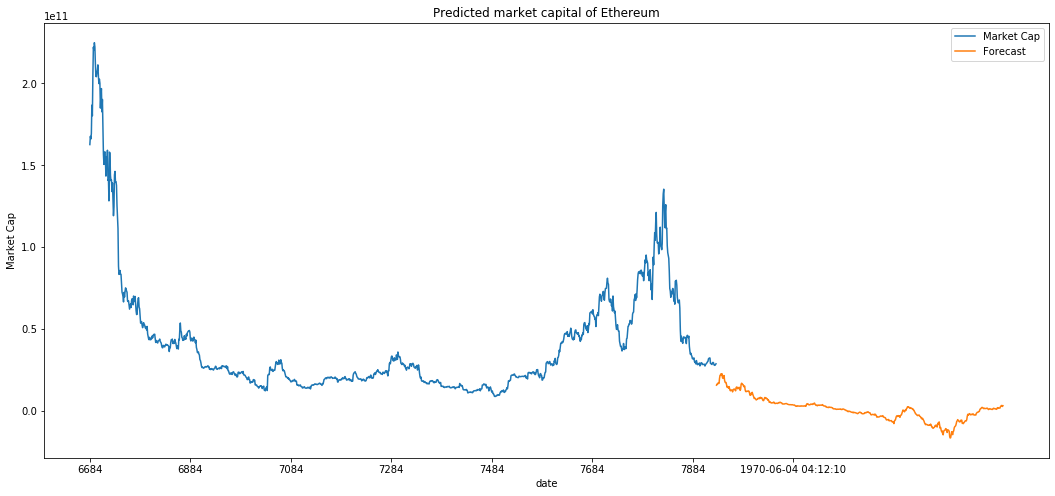

In [70]:
plt.figure(figsize=(18, 8))
df2['Market Cap'].plot()
df2['Forecast'].plot()
plt.legend(loc=1)
plt.xlabel('date')
plt.ylabel('Market Cap')
plt.title('Predicted market capital of Ethereum')
plt.show()

(676, 9) (676,)
0.9991862823122168


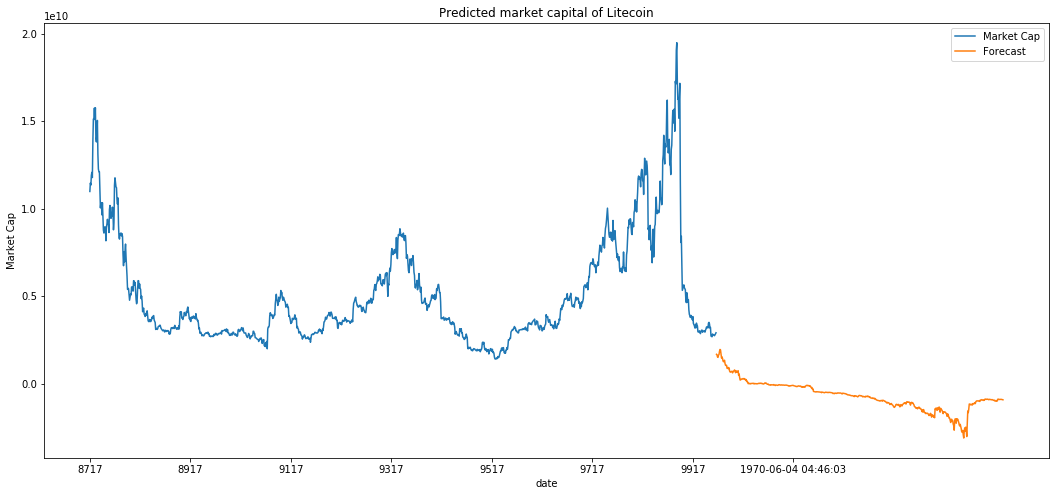

In [71]:

df3 = df[ df['Crypto'] ==5]
df3



scaler = StandardScaler()
X = np.array(df3.drop(['Pred_mc'], 1)) 
scaler.fit(X)

X = scaler.transform(X)

X_Pred2 = X[-forecast:] # data to be predicted
X = X[:-forecast] # data to be trained

df.dropna(inplace=True)
y = np.array(df3['Pred_mc'])
y = y[:-forecast]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
print(lr_confidence)

last_date = df3.index[-1] #getting the lastdate in the dataset
#last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_date + one_day # getting the time in seconds for the next day
forecast_set = lr.predict(X_Pred2) # predicting forecast data
df3['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df3.loc[next_date] = [np.nan for _ in range(len(df3.columns)-1)]+[i]
    

plt.figure(figsize=(18, 8))
df3['Market Cap'].plot()
df3['Forecast'].plot()
plt.legend(loc=1)
plt.xlabel('date')
plt.ylabel('Market Cap')
plt.title('Predicted market capital of Litecoin')
plt.show()

(676, 9) (676,)
0.6653387792391836


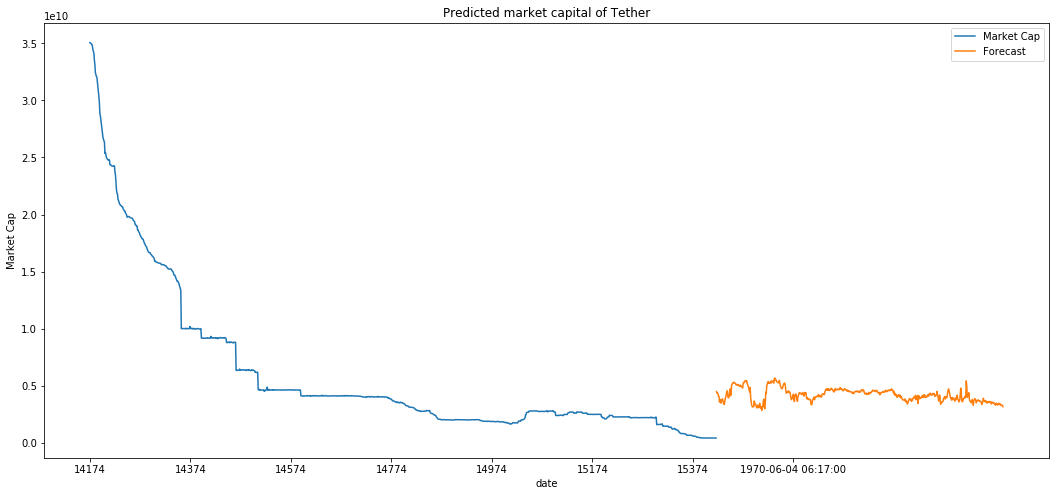

In [72]:

df4 = df[ df['Crypto'] ==8]
df4



scaler = StandardScaler()
X = np.array(df4.drop(['Pred_mc'], 1)) 
scaler.fit(X)

X = scaler.transform(X)

X_Pred2 = X[-forecast:] # data to be predicted
X = X[:-forecast] # data to be trained

df.dropna(inplace=True)
y = np.array(df4['Pred_mc'])
y = y[:-forecast]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
print(lr_confidence)

last_date = df4.index[-1] #getting the lastdate in the dataset
#last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_date + one_day # getting the time in seconds for the next day
forecast_set = lr.predict(X_Pred2) # predicting forecast data
df4['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df4.loc[next_date] = [np.nan for _ in range(len(df4.columns)-1)]+[i]
    

plt.figure(figsize=(18, 8))
df4['Market Cap'].plot()
df4['Forecast'].plot()
plt.legend(loc=1)
plt.xlabel('date')
plt.ylabel('Market Cap')
plt.title('Predicted market capital of Tether')
plt.show()

(105, 9) (105,)
0.9998475409593439


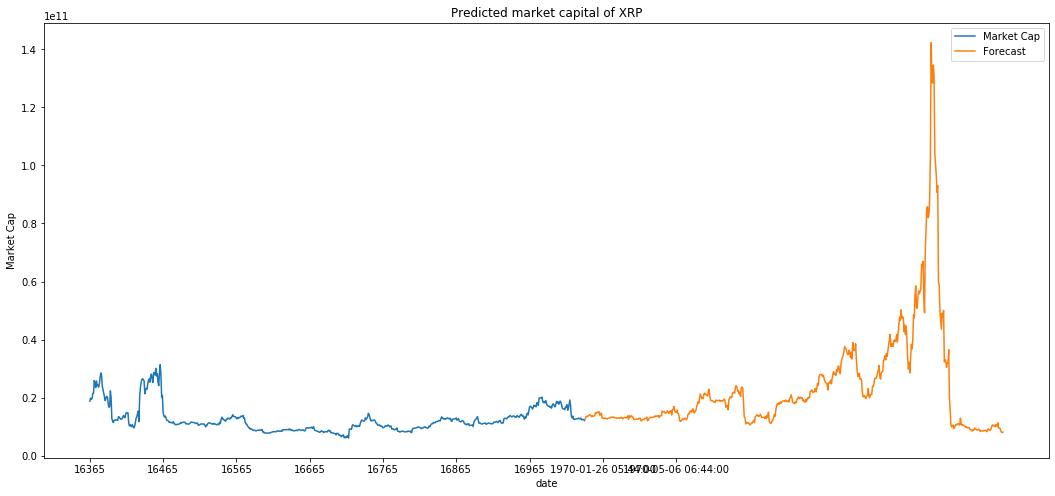

In [73]:

df5 = df[ df['Crypto'] ==9]
df5



scaler = StandardScaler()
X = np.array(df5.drop(['Pred_mc'], 1)) 
scaler.fit(X)

X = scaler.transform(X)

X_Pred2 = X[-forecast:] # data to be predicted
X = X[:-forecast] # data to be trained

df.dropna(inplace=True)
y = np.array(df5['Pred_mc'])
y = y[:-forecast]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
print(lr_confidence)

last_date = df5.index[-1] #getting the lastdate in the dataset
#last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_date + one_day # getting the time in seconds for the next day
forecast_set = lr.predict(X_Pred2) # predicting forecast data
df5['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df5.loc[next_date] = [np.nan for _ in range(len(df5.columns)-1)]+[i]
    

plt.figure(figsize=(18, 8))
df5['Market Cap'].plot()
df5['Forecast'].plot()
plt.legend(loc=1)
plt.xlabel('date')
plt.ylabel('Market Cap')
plt.title('Predicted market capital of XRP')
plt.show()

(105, 9) (105,)
0.9998487916595247


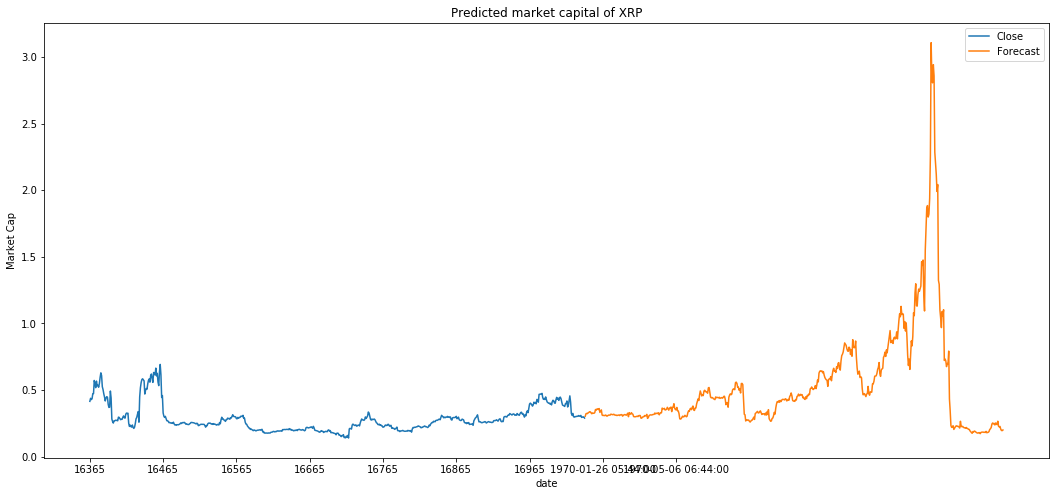

In [74]:

df5 = df[ df['Crypto'] ==9]
df5

scaler = StandardScaler()
X = np.array(df5.drop(['Pred_close'], 1)) 
scaler.fit(X)

X = scaler.transform(X)

X_Pred2 = X[-forecast:] # data to be predicted
X = X[:-forecast] # data to be trained

df.dropna(inplace=True)
y = np.array(df5['Pred_close'])
y = y[:-forecast]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
print(lr_confidence)

last_date = df5.index[-1] #getting the lastdate in the dataset
#last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_date + one_day # getting the time in seconds for the next day
forecast_set = lr.predict(X_Pred2) # predicting forecast data
df5['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df5.loc[next_date] = [np.nan for _ in range(len(df5.columns)-1)]+[i]
    

plt.figure(figsize=(18, 8))
df5['Close'].plot()
df5['Forecast'].plot()
plt.legend(loc=1)
plt.xlabel('date')
plt.ylabel('Close Price')
plt.title('Predicted close price of XRP')
plt.show()

(676, 9) (676,)
-0.017601193328401044


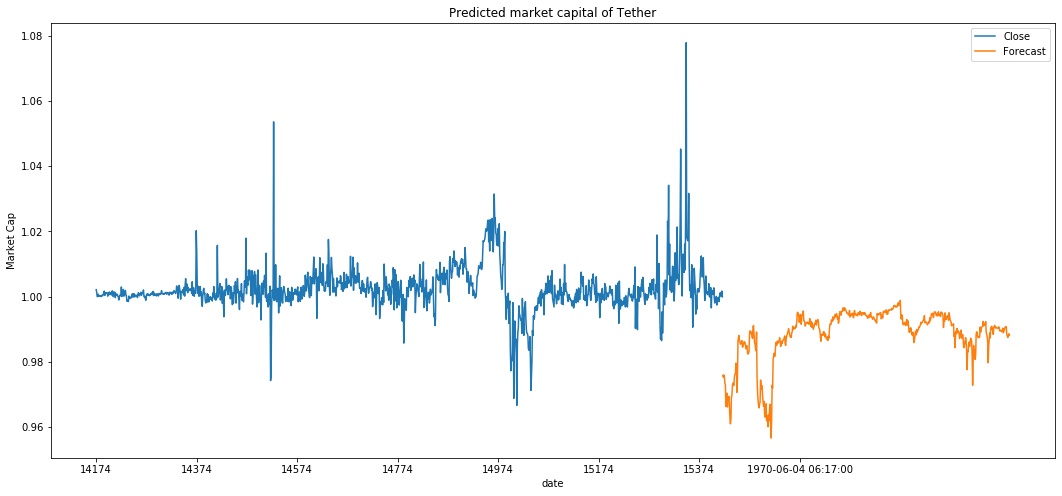

In [75]:

df4 = df[ df['Crypto'] ==8]
df4



scaler = StandardScaler()
X = np.array(df4.drop(['Pred_close'], 1)) 
scaler.fit(X)

X = scaler.transform(X)

X_Pred2 = X[-forecast:] # data to be predicted
X = X[:-forecast] # data to be trained

df.dropna(inplace=True)
y = np.array(df4['Pred_close'])
y = y[:-forecast]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
print(lr_confidence)

last_date = df4.index[-1] #getting the lastdate in the dataset
#last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_date + one_day # getting the time in seconds for the next day
forecast_set = lr.predict(X_Pred2) # predicting forecast data
df4['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df4.loc[next_date] = [np.nan for _ in range(len(df4.columns)-1)]+[i]
    

plt.figure(figsize=(18, 8))
df4['Close'].plot()
df4['Forecast'].plot()
plt.legend(loc=1)
plt.xlabel('date')
plt.ylabel('Close price')
plt.title('Predicted close price of Tether')
plt.show()

(676, 9) (676,)
0.9992073058924513


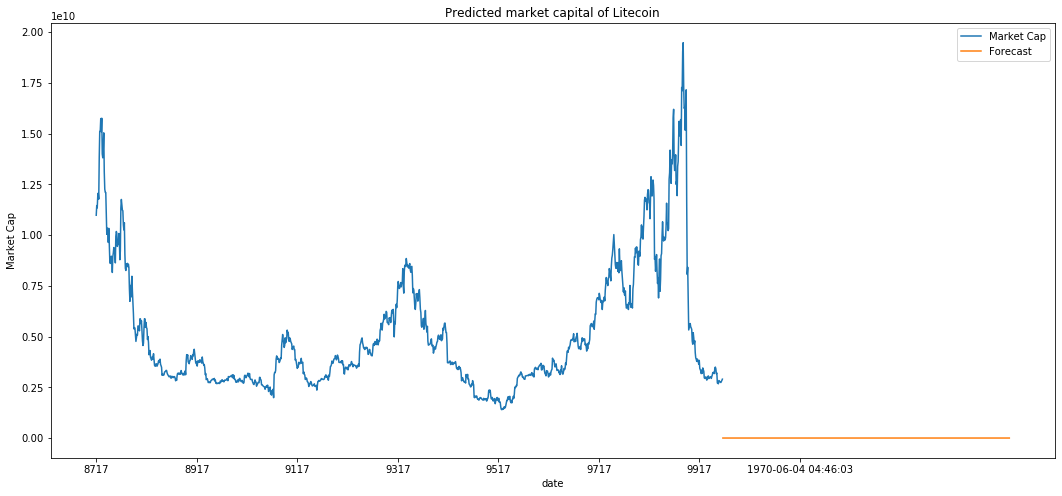

In [77]:

df3 = df[ df['Crypto'] ==5]
df3


scaler = StandardScaler()
X = np.array(df3.drop(['Pred_close'], 1)) 
scaler.fit(X)

X = scaler.transform(X)

X_Pred2 = X[-forecast:] # data to be predicted
X = X[:-forecast] # data to be trained

df.dropna(inplace=True)
y = np.array(df3['Pred_close'])
y = y[:-forecast]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
print(lr_confidence)

last_date = df3.index[-1] #getting the lastdate in the dataset
#last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_date + one_day # getting the time in seconds for the next day
forecast_set = lr.predict(X_Pred2) # predicting forecast data
df3['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df3.loc[next_date] = [np.nan for _ in range(len(df3.columns)-1)]+[i]
    

plt.figure(figsize=(18, 8))
df3['Close Price'].plot()
df3['Forecast'].plot()
plt.legend(loc=1)
plt.xlabel('date')
plt.ylabel('Close')
plt.title('Predicted Close price of Litecoin')
plt.show()

(676, 9) (676,)
0.9997375279262529


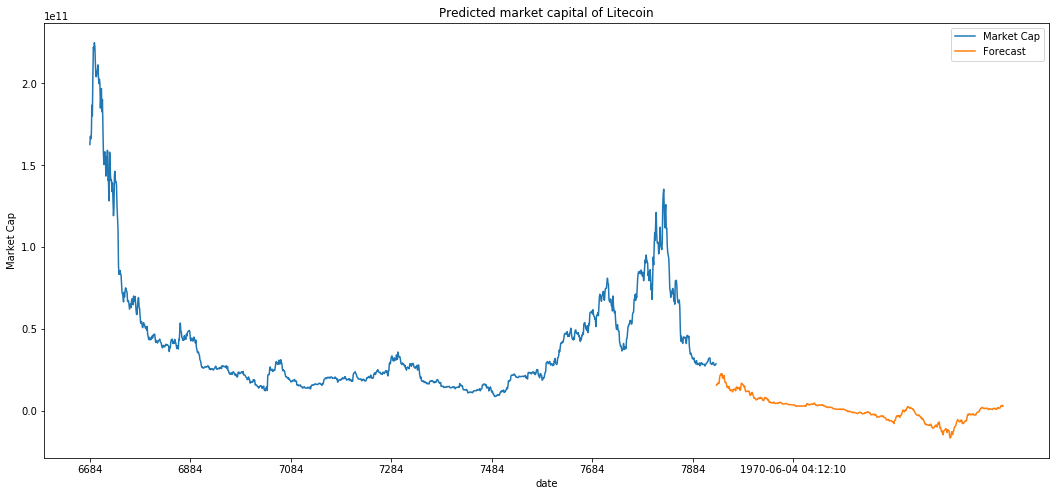

In [79]:

df2 = df[ df['Crypto'] ==4]
df2



scaler = StandardScaler()
X = np.array(df2.drop(['Pred_mc'], 1)) 
scaler.fit(X)

X = scaler.transform(X)

X_Pred2 = X[-forecast:] # data to be predicted
X = X[:-forecast] # data to be trained

df.dropna(inplace=True)
y = np.array(df2['Pred_mc'])
y = y[:-forecast]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
print(lr_confidence)

last_date = df2.index[-1] #getting the lastdate in the dataset
#last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_date + one_day # getting the time in seconds for the next day
forecast_set = lr.predict(X_Pred2) # predicting forecast data
df2['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df2.loc[next_date] = [np.nan for _ in range(len(df2.columns)-1)]+[i]
    

plt.figure(figsize=(18, 8))
df2['Close price'].plot()
df2['Forecast'].plot()
plt.legend(loc=1)
plt.xlabel('date')
plt.ylabel('Close Price')
plt.title('Predicted Close price of Ethereum')
plt.show()

(676, 9) (676,)
0.9997670248357254


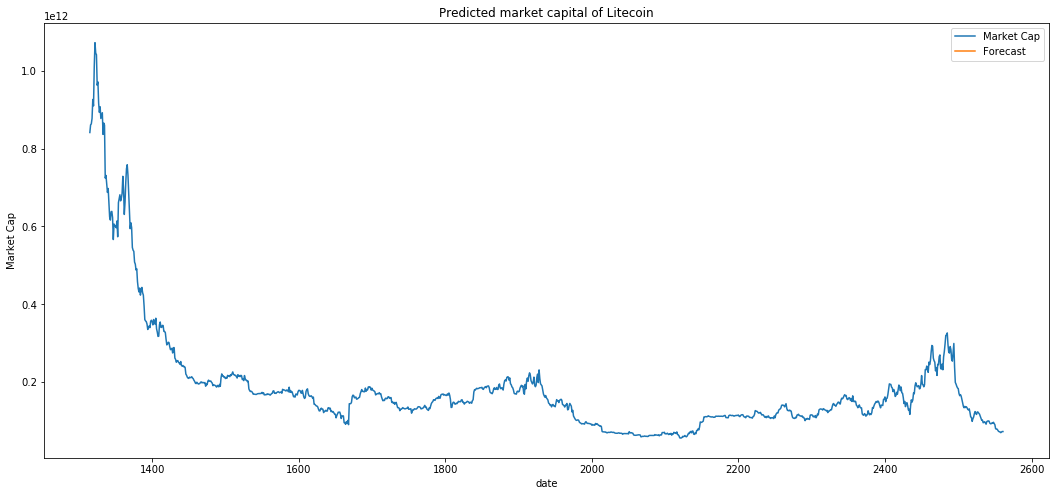

In [80]:

df1 = df[ df['Crypto'] ==1]
df1



scaler = StandardScaler()
X = np.array(df1.drop(['Pred_mc'], 1)) 
scaler.fit(X)

X = scaler.transform(X)

X_Pred2 = X[-forecast:] # data to be predicted
X = X[:-forecast] # data to be trained

df.dropna(inplace=True)
y = np.array(df1['Pred_mc'])
y = y[:-forecast]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
print(lr_confidence)

last_date = df1.index[-1] #getting the lastdate in the dataset
#last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_date + one_day # getting the time in seconds for the next day
forecast_set = lr.predict(X_Pred2) # predicting forecast data
df1['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df2.loc[next_date] = [np.nan for _ in range(len(df1.columns)-1)]+[i]
    

plt.figure(figsize=(18, 8))
df1['Market Cap'].plot()
df1['Forecast'].plot()
plt.legend(loc=1)
plt.xlabel('date')
plt.ylabel('Market Cap')
plt.title('Predicted close price of Bitcoin')
plt.show()